### Import relevant libraries

In [20]:
from semopy import Model, calc_stats, semplot
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np
import seaborn as sns
from semopy.inspector import inspect


### Import the dataset

In [4]:
df = pd.read_csv("Welzijnsmonitor2025_scaled_normalised_UTF8.csv", sep=";")

### Creating the model

In [5]:
model_desc = """
# measurement model
engagement =~ Bevl_1 + Bevl_2 + Bevl_3
emotional_exhaustion =~ Burn1_1 + Burn1_2 + Burn1_3 + Burn1_4
study_motivation =~ Mot_Stress_1
study_stress =~ Mot_Stress_2
unnecess_stress =~ Onnodige_stress_1 + Onnodige_stress_2 + Onnodige_stress_3 + Onnodige_stress_4 + Onnodige_stress_5 + Onnodige_stress_6 + Onnodige_stress_7 + Onnodige_stress_8 + Onnodige_stress_9 + Onnodige_stress_10
life_style =~ Leefst
life_satisfaction =~ Cantrill_1
depression =~ Depr_1 + Depr_2 + Depr_3 + Depr_4 + Depr_5 + Depr_6 + Depr_7 + Depr_8
study_point =~ StPunt_beh
grade =~ Cijfer_huidig_1
study_delay =~ Vertr
stop_study =~ StopInt
support_study =~ Hulp_1
support_practical =~ Hulp_2
support_socio =~ Hulp_3
curriculum_engagement =~ Cogn_Eng1_1 + Cogn_Eng1_2 + Cogn_Eng1_3 + Cogn_Eng1_4 
belonging =~ Cogn_Eng1_5 + Cogn_Eng1_6
social_integration =~ Cogn_Eng2_1 + Cogn_Eng2_2 + Cogn_Eng2_3 + Cogn_Eng2_4
academic_integration =~ Cogn_Eng2_5 + Cogn_Eng2_6 + Cogn_Eng2_7 + Cogn_Eng2_8
participation =~ Partici1_1 + Partici1_2 + Partici1_3 + Partici1_4
continue_study =~ Stopint2
parents_engagement =~ Betrok_Ouders
work_hour =~ Werk_1

# regressions

"""

In [6]:
model = Model(model_desc)
model.fit(df)
latent_scores = model.predict_factors(df)

# Export the model with the new latent variables and their descriptive statistics

In [ ]:
latent_scores = model.predict_factors(df)

latent_scores.to_csv("latent_variable_scores.csv", index=False)

latent_scores.describe()

Latent variable scores extracted:


,academic_integration,belonging,continue_study,curriculum_engagement,depression,emotional_exhaustion,engagement,grade,life_satisfaction,life_style,...,stop_study,study_delay,study_motivation,study_point,study_stress,support_practical,support_socio,support_study,unnecess_stress,work_hour
count,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,...,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02
mean,-1.213660e-16,-3.760507e-16,1.930823e-17,-2.482486e-16,-1.103327e-17,-8.458842e-17,-1.838879e-18,1.025175e-16,9.194394e-17,-2.643388e-16,...,-2.666374e-17,3.861645e-17,-1.471103e-16,6.767074e-16,-5.599386e-16,7.355515e-18,-1.985989e-16,2.795096e-16,-4.045533e-17,-8.458842e-17
std,6.144743e-01,6.998163e-01,6.256395e-02,5.297800e-01,7.866699e-01,6.693341e-01,5.104074e-01,2.357452e-01,4.431820e-01,3.709547e-01,...,2.224112e-01,4.407751e-01,6.510841e-01,8.812806e-01,5.634802e-01,4.577328e-01,7.813540e-01,6.598952e-01,5.999089e-01,2.811822e-01
min,-2.234810e+00,-2.924619e+00,-4.405992e-01,-2.335379e+00,-1.716071e+00,-1.894087e+00,-2.082356e+00,-1.484371e+00,-1.665404e+00,-1.445294e+00,...,-3.381628e-01,-1.118822e+00,-2.836247e+00,-2.634219e+00,-1.727415e+00,-8.206817e-01,-1.704500e+00,-1.364795e+00,-1.588224e+00,-5.992747e-01
25%,-3.768268e-01,-3.934523e-01,-5.909298e-03,-3.451860e-01,-5.948536e-01,-4.770940e-01,-2.988998e-01,-1.122883e-01,-2.608468e-01,-2.402350e-01,...,-1.487368e-01,-3.171373e-01,-4.019827e-01,-5.156694e-01,-3.801546e-01,-3.222141e-01,-5.665137e-01,-4.706934e-01,-4.014735e-01,-1.998717e-01
50%,3.175151e-02,1.089534e-01,9.759309e-03,5.813514e-02,-1.047525e-01,-2.152392e-02,8.731716e-02,2.450722e-02,6.841405e-02,7.685433e-02,...,-7.751892e-02,-6.504883e-02,5.990458e-02,-1.407510e-01,-9.115707e-03,-1.441175e-01,-1.443722e-01,-1.794209e-01,3.804066e-02,-4.472152e-02
75%,4.147344e-01,4.255421e-01,2.379715e-02,3.332971e-01,4.778655e-01,4.437647e-01,3.381086e-01,1.394941e-01,3.174669e-01,2.512226e-01,...,5.572347e-02,2.439590e-01,4.300114e-01,2.992336e-01,3.653266e-01,1.901834e-01,4.189822e-01,3.847054e-01,4.222041e-01,1.797669e-01
max,1.762943e+00,1.469490e+00,7.485941e-02,1.247003e+00,2.881339e+00,2.198730e+00,1.291314e+00,6.896210e-01,9.305595e-01,8.997659e-01,...,9.373090e-01,2.021354e+00,2.087050e+00,4.130755e+00,1.935891e+00,1.635341e+00,2.895749e+00,2.300919e+00,1.468555e+00,9.295824e-01


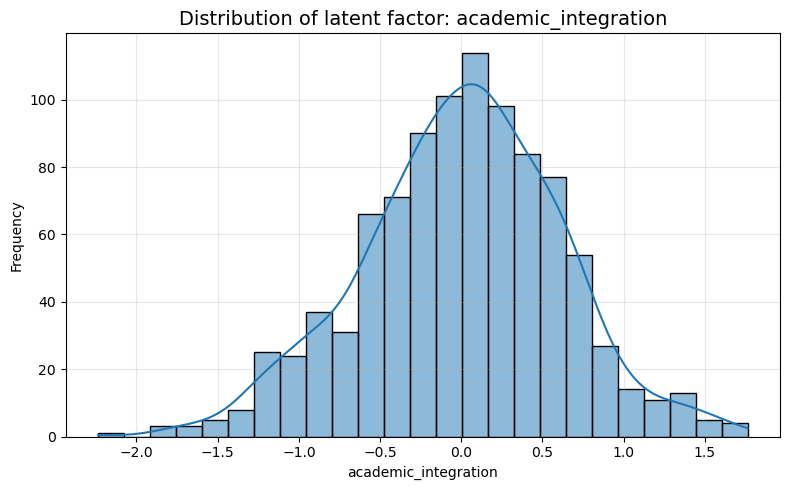

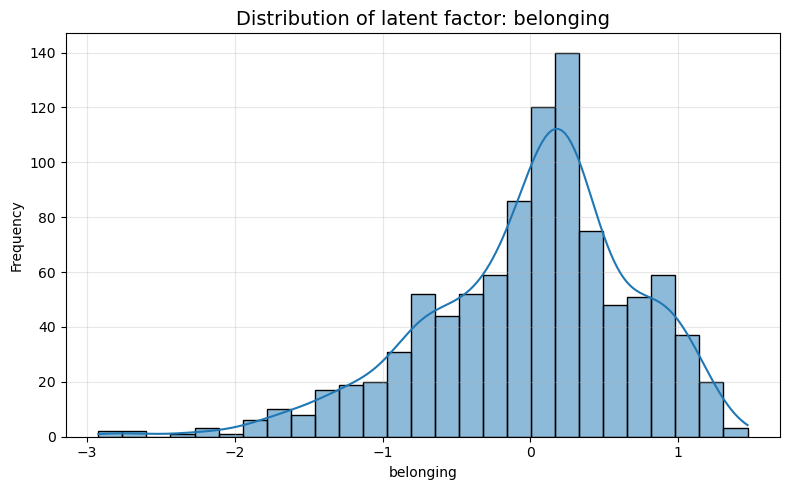

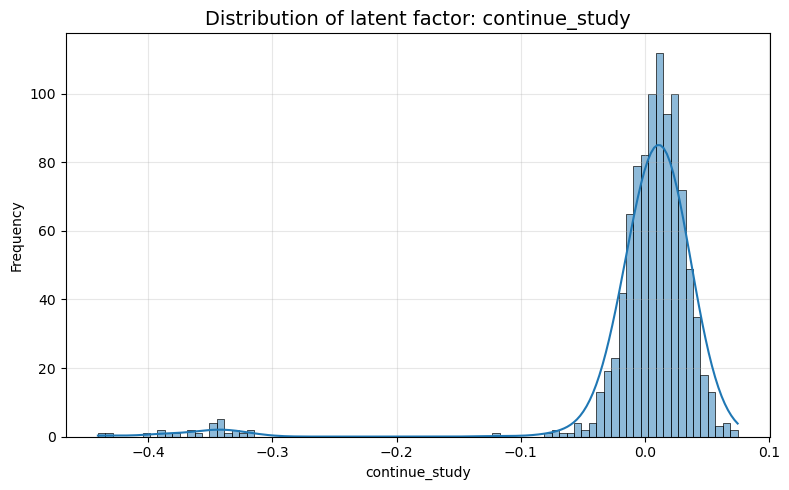

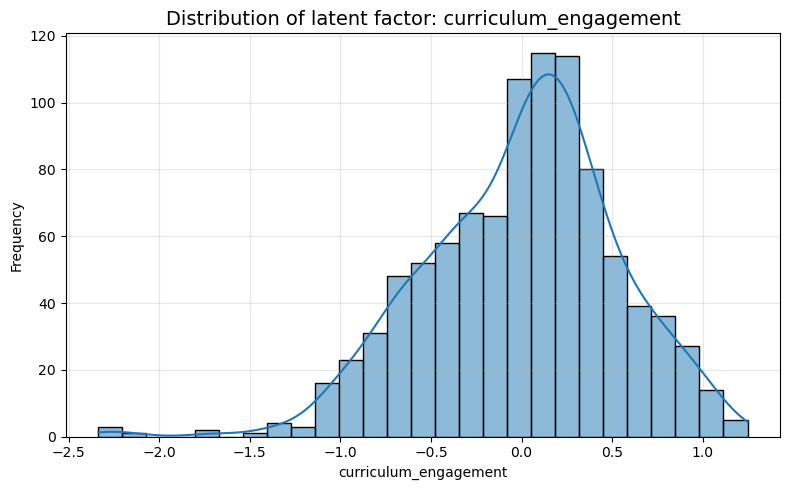

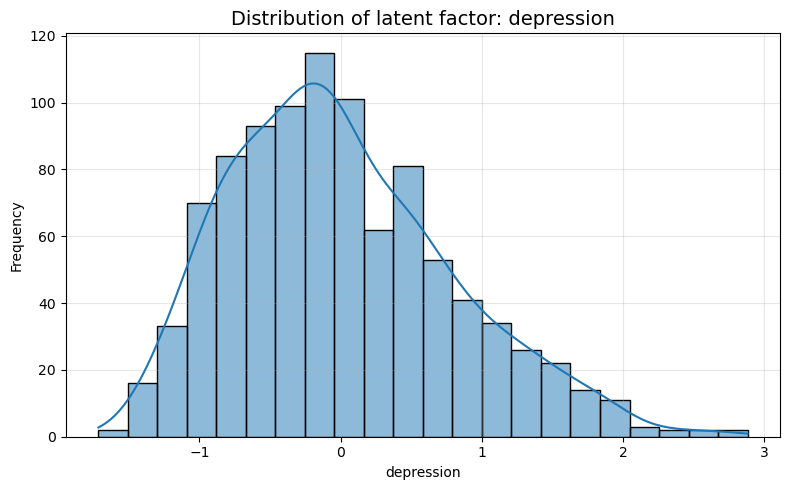

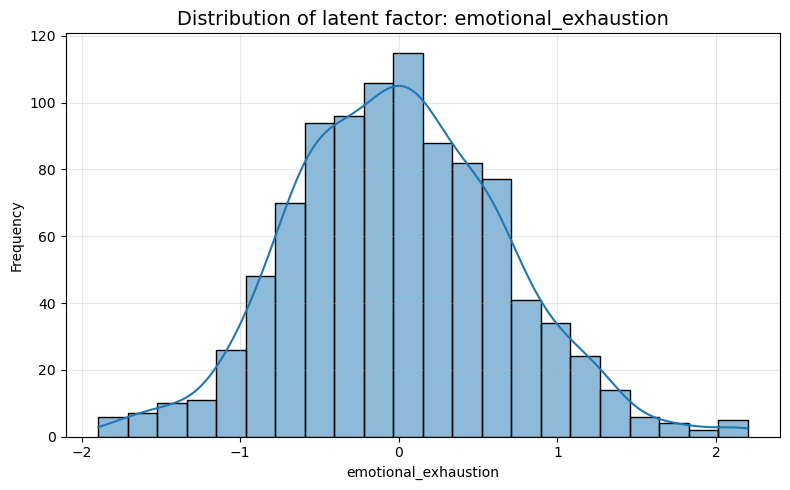

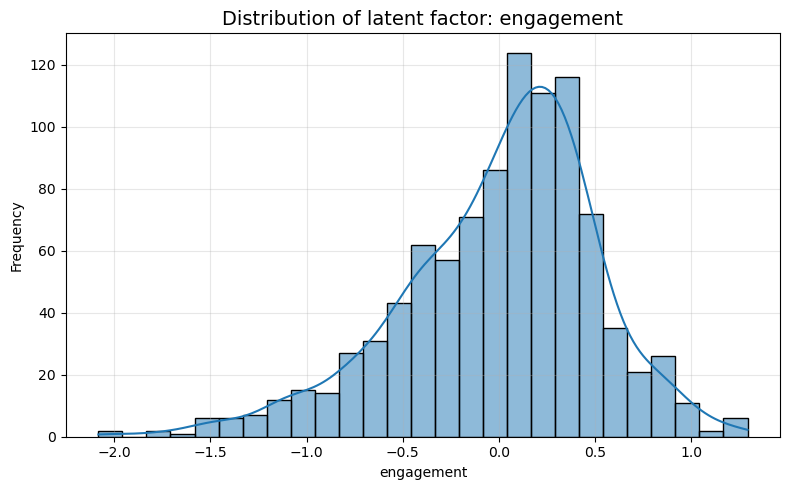

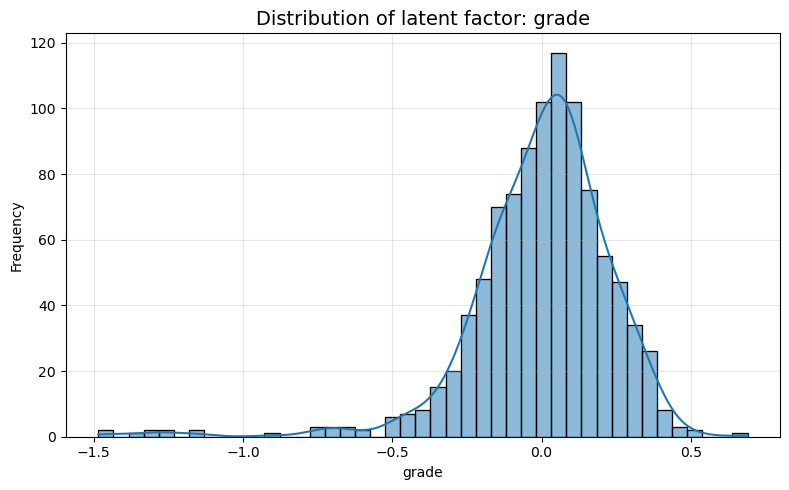

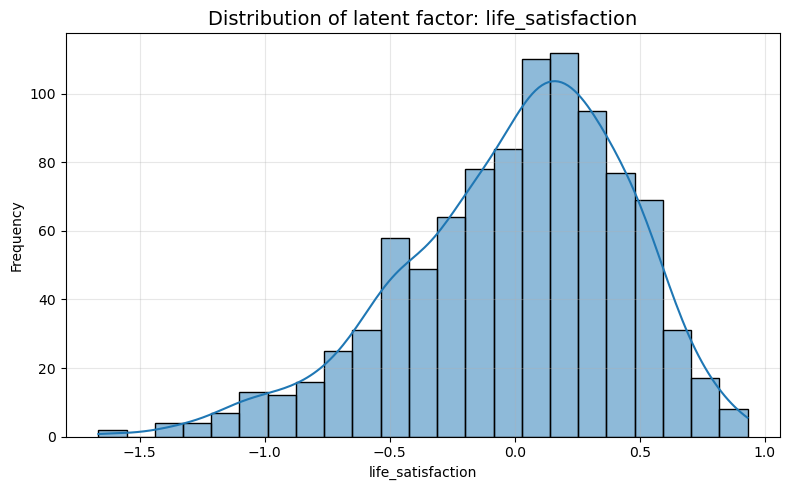

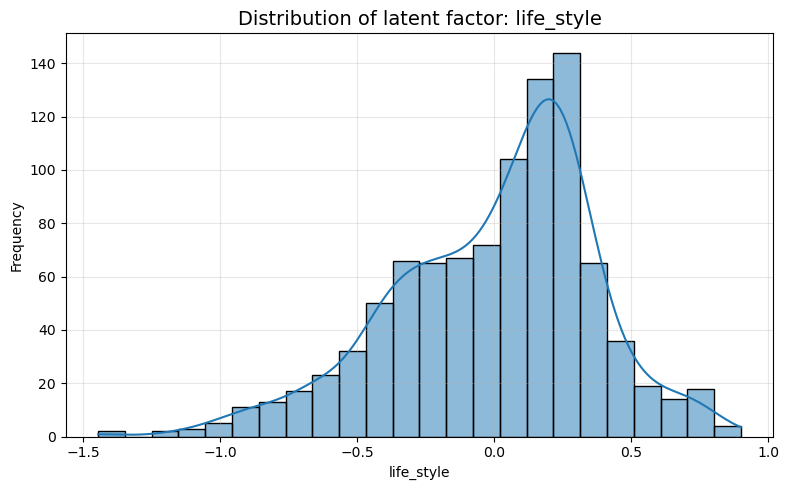

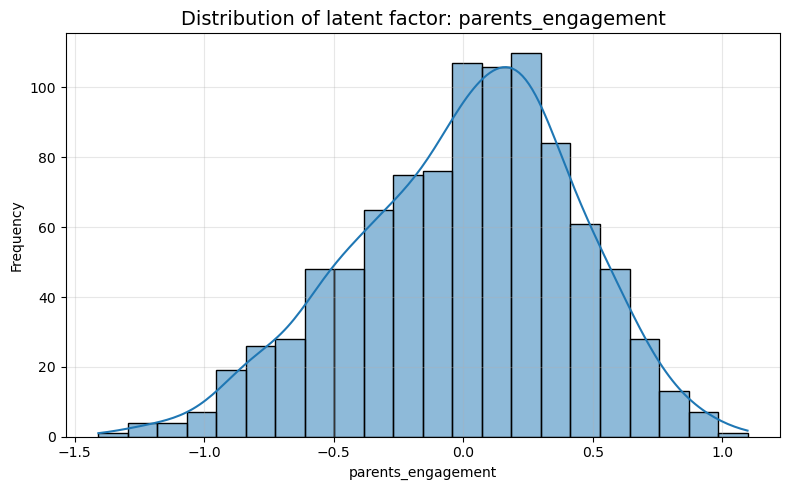

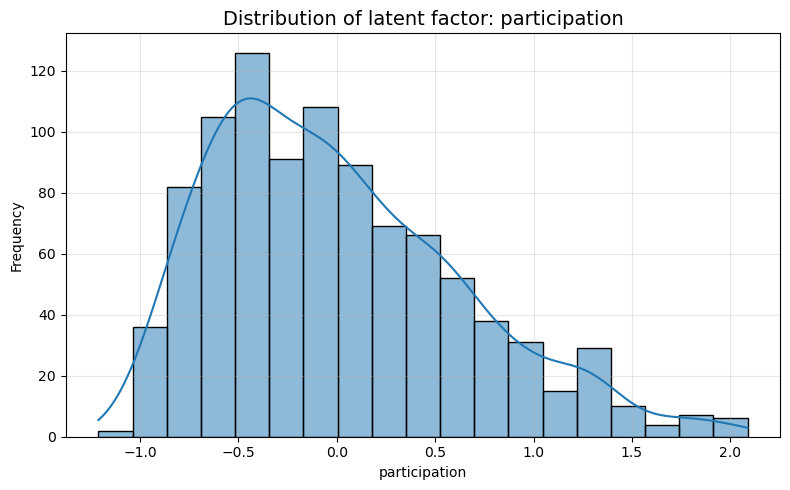

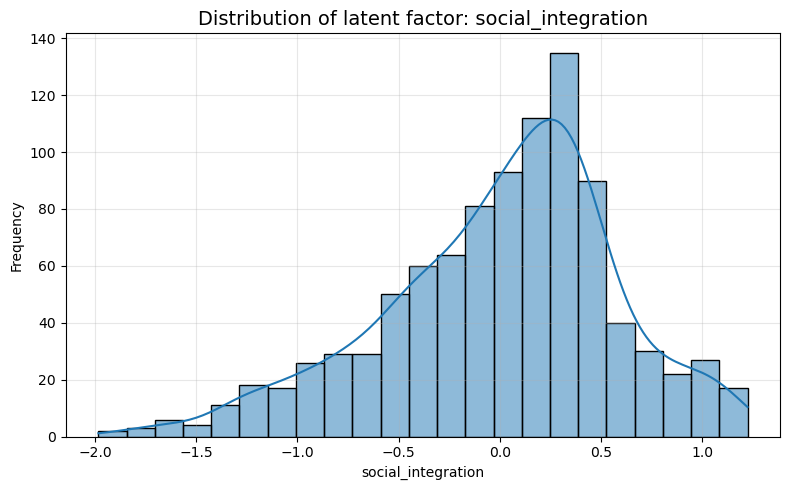

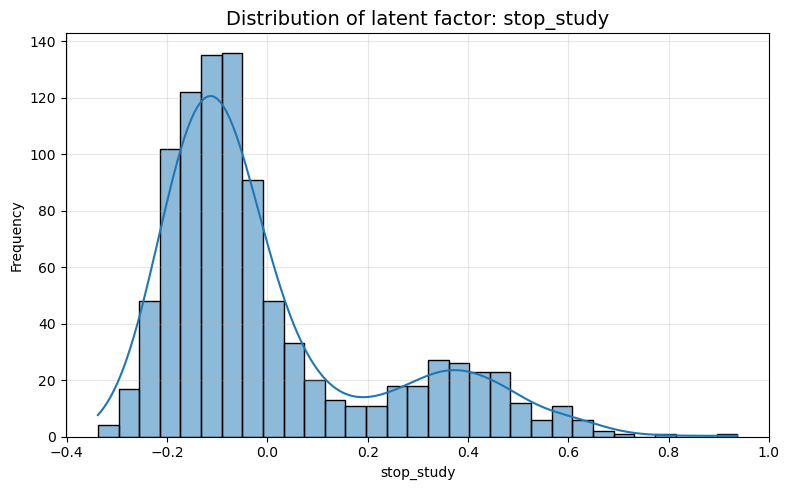

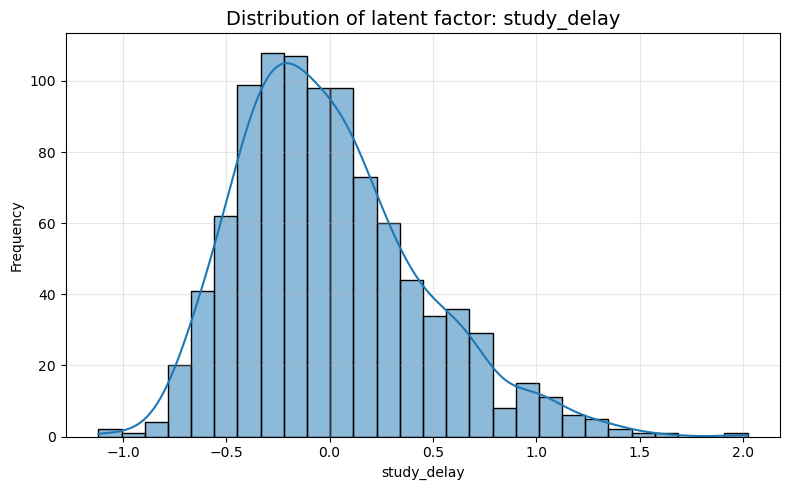

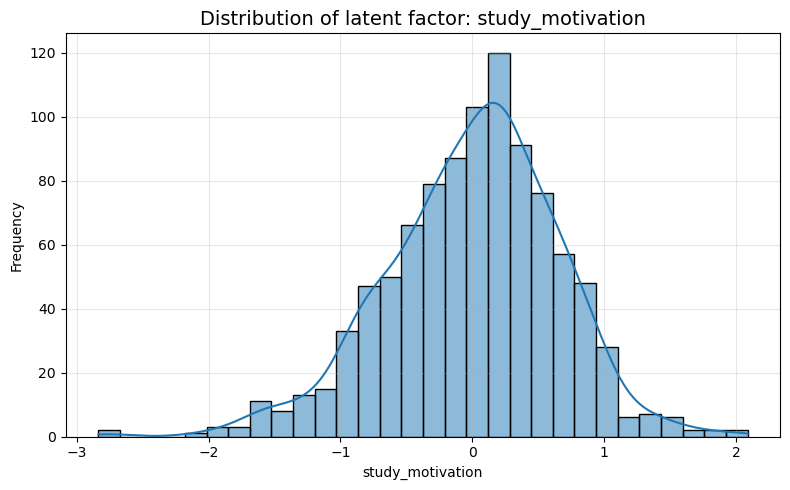

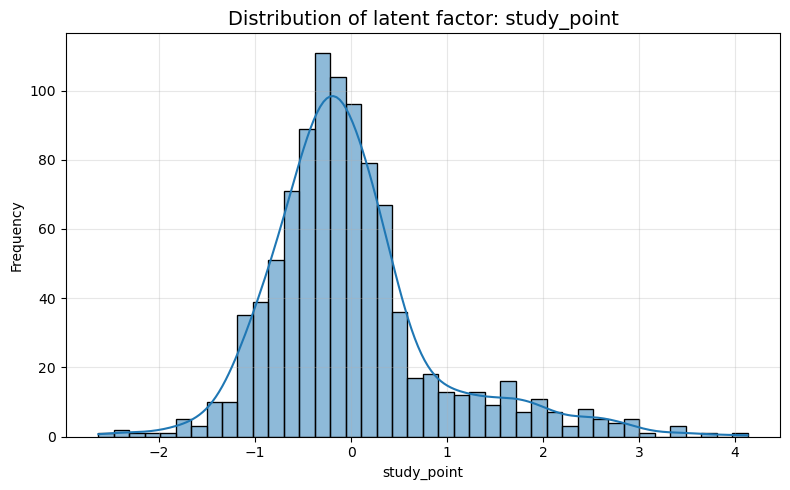

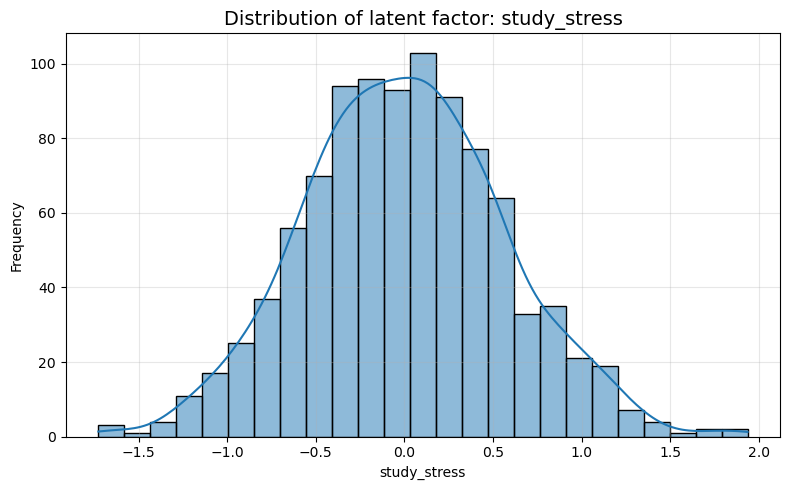

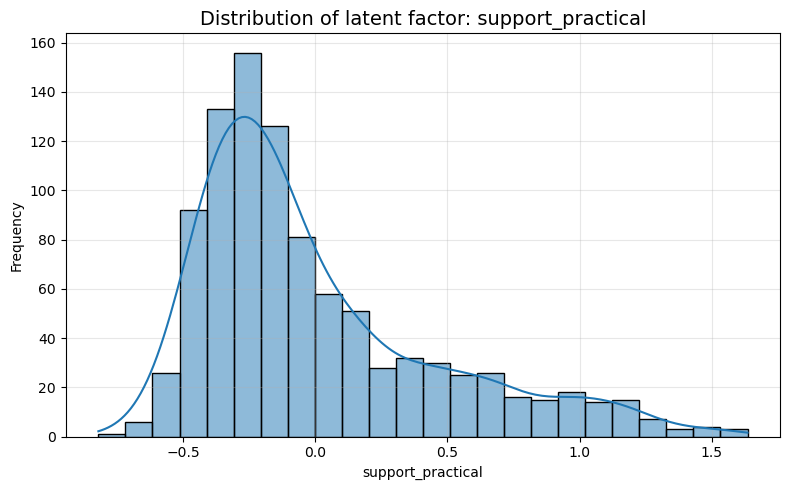

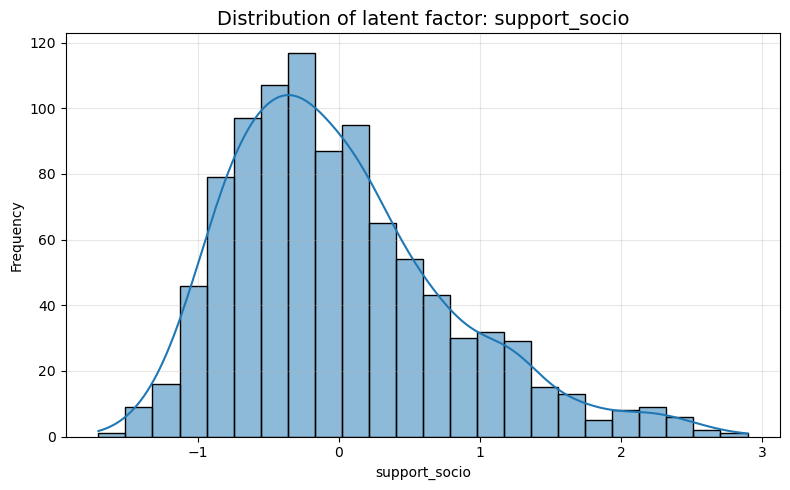

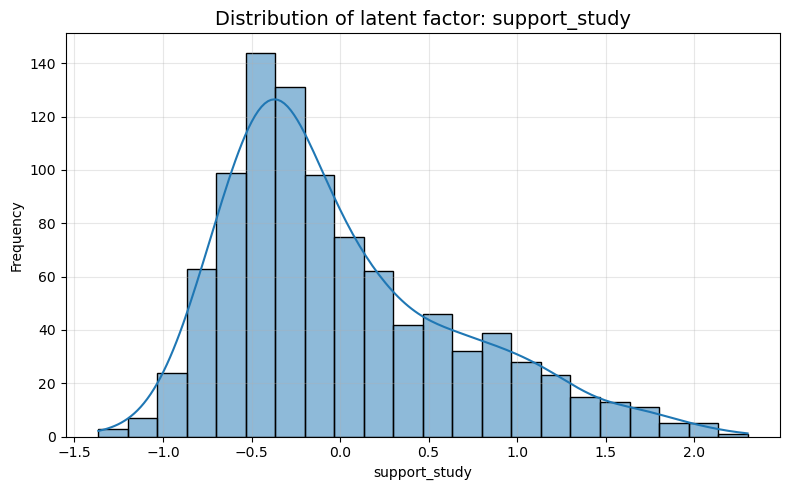

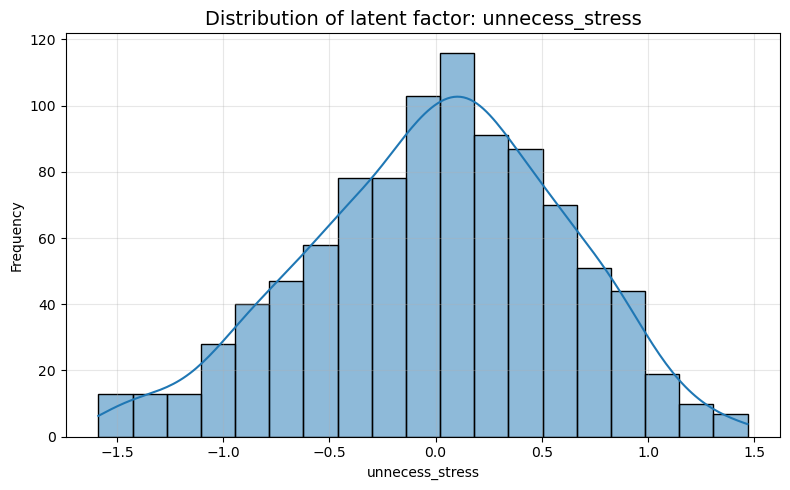

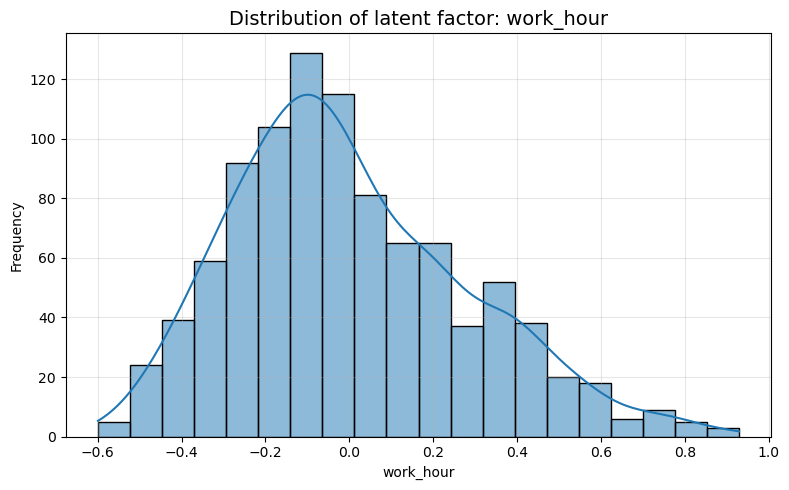

In [26]:
# Plot histogram for each latent variable
for col in latent_scores.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(latent_scores[col], kde=True)
    plt.title(f"Distribution of latent factor: {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [27]:
# Compute latent factor scores
latent_scores = model.predict_factors(df)

# Correlation matrix
corr_matrix = latent_scores.corr()

print("\n=== CORRELATION MATRIX OF LATENT FACTORS ===")
print(corr_matrix)


=== CORRELATION MATRIX OF LATENT FACTORS ===
                       academic_integration  belonging  continue_study  \
academic_integration               1.000000   0.643125        0.357253   
belonging                          0.643125   1.000000        0.426426   
continue_study                     0.357253   0.426426        1.000000   
curriculum_engagement              0.409061   0.480920        0.242592   
depression                        -0.235249  -0.453506       -0.221856   
emotional_exhaustion              -0.308806  -0.529963       -0.208144   
engagement                         0.517848   0.766887        0.382491   
grade                              0.168552   0.289197        0.068379   
life_satisfaction                  0.342039   0.556586        0.247678   
life_style                         0.208355   0.219994       -0.029270   
parents_engagement                 0.254081   0.454307        0.089599   
participation                      0.544248   0.262357        0.18

### Create a minmax normaliztion for latent varibles (Temporary solution)

In [25]:
scaler = MinMaxScaler()

latent_scores_normalized = pd.DataFrame(
    scaler.fit_transform(latent_scores),
    columns=latent_scores.columns,
    index=latent_scores.index
)

In [17]:
df_with_latent_norm = df.copy()
for col in latent_scores_normalized.columns:
    df_with_latent_norm[col + "_norm"] = latent_scores_normalized[col]

# Save if needed
# df_with_latent_norm.to_csv("data_with_normalized_latent_variables.csv", index=False)

### Calculate fit indices

In [10]:
stats = calc_stats(model)

print("=== Model Fit Statistics ===")
print(stats.T)

=== Model Fit Statistics ===
                      Value
DoF             1286.000000
DoF Baseline    1596.000000
chi2            5739.968264
chi2 p-value       0.000000
chi2 Baseline  31735.985357
CFI                0.852224
GFI                0.819134
AGFI               0.775535
NFI                0.819134
TLI                0.816601
RMSEA              0.047860
AIC              726.412468
BIC             2679.531313
LogLik             3.793766


### Create and save the path diagram

In [11]:
g = semplot(model, "pd.png")

In [12]:
print(g)

digraph G {
	overlap=scale splines=true
	edge [fontsize=12]
	node [fillcolor="#cae6df" shape=circle style=filled]
	depression [label=depression]
	life_style [label=life_style]
	unnecess_stress [label=unnecess_stress]
	participation [label=participation]
	life_satisfaction [label=life_satisfaction]
	emotional_exhaustion [label=emotional_exhaustion]
	curriculum_engagement [label=curriculum_engagement]
	stop_study [label=stop_study]
	engagement [label=engagement]
	belonging [label=belonging]
	study_delay [label=study_delay]
	support_socio [label=support_socio]
	study_point [label=study_point]
	academic_integration [label=academic_integration]
	work_hour [label=work_hour]
	social_integration [label=social_integration]
	study_stress [label=study_stress]
	support_practical [label=support_practical]
	parents_engagement [label=parents_engagement]
	study_motivation [label=study_motivation]
	support_study [label=support_study]
	grade [label=grade]
	continue_study [label=continue_study]
	node [sh

In [ ]:
# regressions
# Stressoren ~ Energiebronnen
# Energiebronnen ~ Stressoren

# Stressreacties ~ Stressoren + Energiebronnen + Welbevinden
# Welbevinden ~ Stressoren + Energiebronnen + Stressreacties

# Positieve_Uitkomsten ~ Welbevinden + Stressreacties
# Negatieve_Uitkomsten ~ Welbevinden + Stressreacties